# **PART 1**

In [20]:
#Install relevant packages
!pip install yahoofinancials
!pip install yfinance
!pip install stats

#pandas (all lowercase) is a popular Python-based data analysis toolkit
import pandas as pd
import yfinance as yf
#NumPy is a general-purpose array-processing package.
import numpy as np
import matplotlib.pyplot as plt
#import pandas_datareader as web
import yahoofinancials as YahooFinancials
from yahoofinancials import YahooFinancials
import sys
#import scipy stats
from scipy.stats import norm
from scipy import stats

#PART A - Download daily prices data of Netflix stock from Yahoo for the period 01/02/2004 until 12/31/2019
nflx_dp = YahooFinancials('NFLX')
data = nflx_dp.get_historical_price_data(start_date='2004-01-02', end_date='2019-12-31', time_interval='daily')

#PART B - See the type of the downloaded data
print(type(data))

#PART B - See the size (in bytes) of the downloaded data
print(sys.getsizeof(data))

#PART C - Create data frame and observe first 5 rows
nflx_df = pd.DataFrame(data['NFLX']['prices'])
nflx_df.head()




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=4ccd8c7eb7f49a353c8949af9eb87b671111739f144aade3de18c81e2b4e1b5f
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 30.3 MB/s 
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24299 sha256=b196f3280813067533069d15e69f561a9

,date,high,low,open,close,volume,adjclose,formatted_date
0,1073053800,4.127857,3.842143,4.107143,3.916429,50230600,3.916429,2004-01-02
1,1073313000,4.061429,3.875000,3.892857,3.992857,25207000,3.992857,2004-01-05
2,1073399400,4.339286,3.937143,3.946429,4.257857,52633000,4.257857,2004-01-06
3,1073485800,4.470000,4.249286,4.307143,4.445714,68432000,4.445714,2004-01-07
4,1073572200,4.564286,4.291429,4.539286,4.432857,37178400,4.432857,2004-01-08


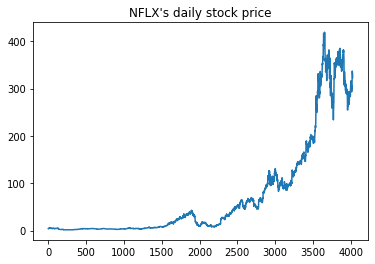

In [21]:
#PART D - Plot the daily prices
nflx_df['close'].plot(title="NFLX's daily stock price")

In [22]:
#PART E - Computing Log returns: logRt=ln(P1/P0) equivalently logRt=ln(P1)-ln(P0)
nflx_daily_log_returns=np.log(nflx_df['close']/nflx_df['close'].shift(1))

nflx_daily_log_returns.head()

0         NaN
1    0.019327
2    0.064259
3    0.043175
4   -0.002896
Name: close, dtype: float64

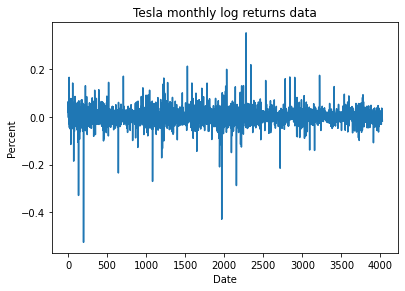

In [23]:
#Dropping null observation
nflx_daily_log_returns_drop=nflx_daily_log_returns.dropna()

#PART F - Plot the daily log returns of NFLX
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(nflx_daily_log_returns_drop)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Tesla monthly log returns data")
plt.show()

In [24]:
#PART G - Provide the summary stat
nflx_daily_log_returns_drop.describe()

count    4025.000000
mean        0.001097
std         0.034523
min        -0.526049
25%        -0.013657
50%         0.000300
75%         0.016354
max         0.352230
Name: close, dtype: float64

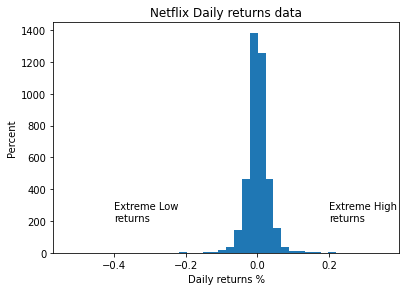

In [25]:
#PART H - Construct a histogram to see the distribution of daily returns
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
nflx_daily_log_returns_drop.plot.hist(bins = 40)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix Daily returns data")
ax1.text(-0.4,200,"Extreme Low\nreturns")
ax1.text(0.2,200,"Extreme High\nreturns")
plt.show()

Ttest_1sampResult(statistic=2.0150582741126764, pvalue=0.04396492353401763)


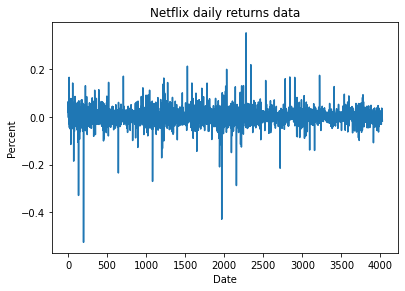

In [26]:
#PART I - Create T-Test to find P-value
stats.ttest_1samp(nflx_daily_log_returns_drop,0)

#PART I - Print p-value
print(stats.ttest_1samp(nflx_daily_log_returns_drop,0))

#PART I - Plot T-Test data
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(nflx_daily_log_returns_drop)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix daily returns data")
plt.show()

# Summary & Analysis

We begin part one of our analysis by downloading yahoo finance and stats to Google Collab.  The next step is to import daily stock prices from Netflix from January 2, 2004 to December 31, 2019. To download this data, we used the code nflx_dp  = YahooFinancials(‘NFLX’).  We then obtained the size of this data using the code print(sys.getsizeof(data)), which was 248 bytes.  The first five rows of the data contain the stock prices for the first five days of the series January 2nd, 5th, 6th, 7th and 8th. Note that there’s no data for the 3rd and 4th of January, because no trading happens on the weekends. The code we used to get this information was nflx_df = pd.DataFrame(data[‘NFLX’][‘prices’]]  --enter--  nflx_df.head().  We then plotted the data, which shows Netflix stock prices increased substantially from January 2, 2004, until December 31, 2019, however, there were fluctuations at certain periods. The log returns show the rate of return is positive, with a mean of .001, the standard deviation of .034, the minimum was -.526 and the maximum was .352. The p-value was determined to be 4.3%, statistically insignificant at a 95% confidence interval, which means the proper outliers were removed from the dataset. Based on the histogram, most of Netflix’s returns were between 0.0 and 0.05, approximately.

# **PART 2**

In [27]:
#PART A - Download the dataset for three stocks
assets = ['IBM', 'MSFT', 'AAPL']

yahoo_financials = YahooFinancials(assets)

data = yahoo_financials.get_historical_price_data(start_date='2005-01-02', end_date='2019-12-31', time_interval='monthly')


#PART B - prices_df will contain all the price information for the stocks
prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})

#PART D - Observe first 5 rows of data
prices_df.head()

,IBM,MSFT,AAPL
2005-01-01,53.909107,18.588602,1.172494
2005-02-01,53.424377,17.796394,1.367961
2005-03-01,52.832489,17.148884,1.270685
2005-04-01,44.160046,17.950638,1.099613
2005-05-01,43.680176,18.305387,1.212441


In [28]:
#PART C - Print the type of data for the dataset
print(type(prices_df))

#PART C - Print the dimension of data for the dataset
print(prices_df.shape)

<class 'pandas.core.frame.DataFrame'>
(180, 3)


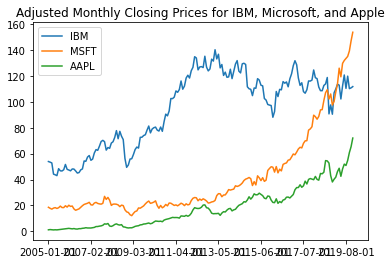

In [29]:
#PART E - Plot all three stocks together
df = {}
df['IBM'] = prices_df['IBM']
df['MSFT'] = prices_df['MSFT']
df['AAPL'] = prices_df['AAPL']
df = pd.DataFrame(df)
df.plot(title="Adjusted Monthly Closing Prices for IBM, Microsoft, and Apple")

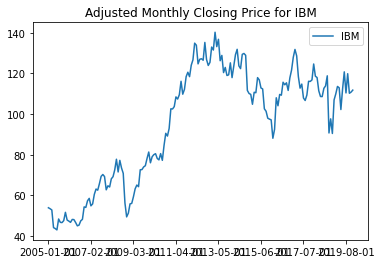

In [30]:
#PART E - Plot IBM individually
df_ibm = {}
df_ibm['IBM'] = prices_df['IBM']
df_ibm = pd.DataFrame(df_ibm)
df_ibm.plot(title="Adjusted Monthly Closing Price for IBM")

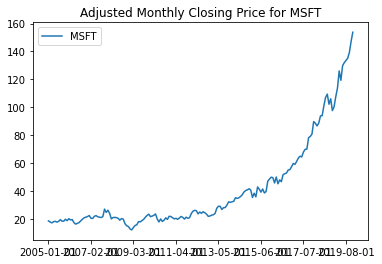

In [31]:
#PART E - Plot MSFT individually
df_msft = {}
df_msft['MSFT'] = prices_df['MSFT']
df_msft = pd.DataFrame(df_msft)
df_msft.plot(title="Adjusted Monthly Closing Price for MSFT")

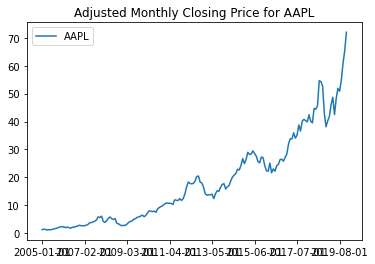

In [32]:
#PART E - Plot AAPL individually
df_aapl = {}
df_aapl['AAPL'] = prices_df['AAPL']
df_aapl = pd.DataFrame(df_aapl)
df_aapl.plot(title="Adjusted Monthly Closing Price for AAPL")

In [33]:
#PART F - Create function for computing log returns
def log_ret(dataframe, *stocks):
  #Computing Log returns: logRt=ln(P1/P0) equivalently logRt=ln(P1)-ln(P0)
  for x in stocks:
    y = np.log(dataframe[x]/dataframe[x].shift(1))
  #Dropping null observation
    z = y.dropna()
    print(z)
  return z

In [34]:
#Test function to ensure it's working as expected
dataset_mlr=log_ret(prices_df,{"IBM", "MSFT", "AAPL"})

                 IBM      AAPL      MSFT
2005-02-01 -0.009032  0.154188 -0.043553
2005-03-01 -0.011141 -0.073766 -0.037063
2005-04-01 -0.179306 -0.144597  0.045693
2005-05-01 -0.010926  0.097677  0.019570
2005-06-01 -0.015378 -0.077091 -0.034752
...              ...       ...       ...
2019-08-01 -0.089640 -0.020390  0.011601
2019-09-01  0.082147  0.074215  0.011775
2019-10-01 -0.083803  0.104977  0.030739
2019-11-01  0.005370  0.071696  0.054365
2019-12-01  0.008688  0.097202  0.044298

[179 rows x 3 columns]


In [35]:
#PART F CONTINUED
#Computing Log returns for IBM
ibm_mlr=log_ret(prices_df,"IBM")

#Computing Log returns for MSFT
msft_mlr=log_ret(prices_df,"MSFT")

#Computing Log returns for AAPL
aapl_mlr=log_ret(prices_df,"AAPL")

2005-02-01   -0.009032
2005-03-01   -0.011141
2005-04-01   -0.179306
2005-05-01   -0.010926
2005-06-01   -0.015378
                ...   
2019-08-01   -0.089640
2019-09-01    0.082147
2019-10-01   -0.083803
2019-11-01    0.005370
2019-12-01    0.008688
Name: IBM, Length: 179, dtype: float64
2005-02-01   -0.043553
2005-03-01   -0.037063
2005-04-01    0.045693
2005-05-01    0.019570
2005-06-01   -0.034752
                ...   
2019-08-01    0.011601
2019-09-01    0.011775
2019-10-01    0.030739
2019-11-01    0.054365
2019-12-01    0.044298
Name: MSFT, Length: 179, dtype: float64
2005-02-01    0.154188
2005-03-01   -0.073766
2005-04-01   -0.144597
2005-05-01    0.097677
2005-06-01   -0.077091
                ...   
2019-08-01   -0.020390
2019-09-01    0.074215
2019-10-01    0.104977
2019-11-01    0.071696
2019-12-01    0.097202
Name: AAPL, Length: 179, dtype: float64


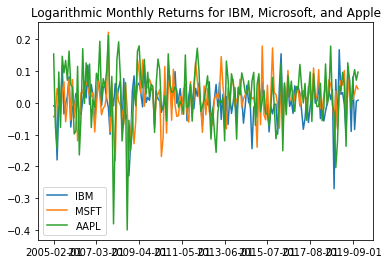

In [36]:
#PART G - Plot all three stocks together
df_log = {}
df_log['IBM'] = ibm_mlr
df_log['MSFT'] = msft_mlr
df_log['AAPL'] = aapl_mlr
df_log = pd.DataFrame(df_log)
df_log.plot(title="Logarithmic Monthly Returns for IBM, Microsoft, and Apple")

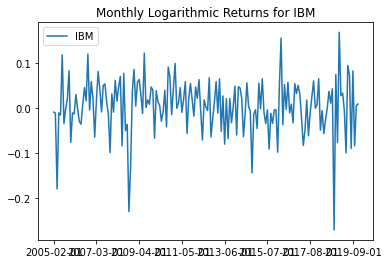

In [37]:
#PART G - Plot log returns for IBM
df_log_ibm = {}
df_log_ibm['IBM'] = ibm_mlr
df_log_ibm = pd.DataFrame(df_log_ibm)
df_log_ibm.plot(title="Monthly Logarithmic Returns for IBM")

In [38]:
#PART H - Provide the summary stat for IBM
ibm_mlr.describe()

count    179.000000
mean       0.004073
std        0.060003
min       -0.270005
25%       -0.020670
50%        0.005831
75%        0.044994
max        0.167670
Name: IBM, dtype: float64

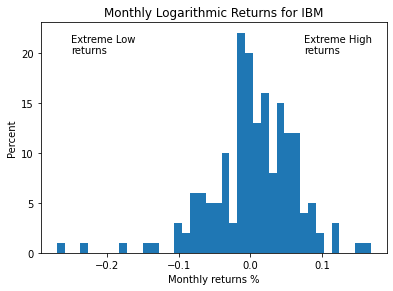

In [39]:
#PART I - See the distribution of monthly returns for IBM
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ibm_mlr.plot.hist(bins = 40)
ax1.set_xlabel("Monthly returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Monthly Logarithmic Returns for IBM")
ax1.text(-0.25,20,"Extreme Low\nreturns")
ax1.text(0.075,20,"Extreme High\nreturns")
plt.show()

In [40]:
#PART J - Create T-Test to find P-value for IBM
stats.ttest_1samp(ibm_mlr,0)

#Print p-value for IBM
print(stats.ttest_1samp(ibm_mlr,0))

Ttest_1sampResult(statistic=0.9082189286526452, pvalue=0.3649905544977312)


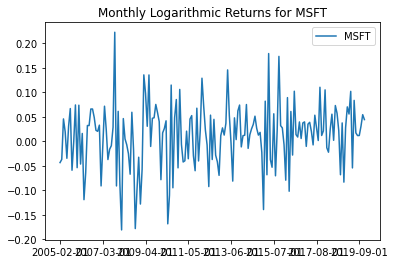

In [41]:
#PART G - Plot log returns for MSFT
df_log_msft = {}
df_log_msft['MSFT'] = msft_mlr
df_log_msft = pd.DataFrame(df_log_msft)
df_log_msft.plot(title="Monthly Logarithmic Returns for MSFT")

In [42]:
#PART H - Provide the summary stat for MSFT
msft_mlr.describe()

count    179.000000
mean       0.011803
std        0.065309
min       -0.181096
25%       -0.029014
50%        0.020659
75%        0.051852
max        0.222736
Name: MSFT, dtype: float64

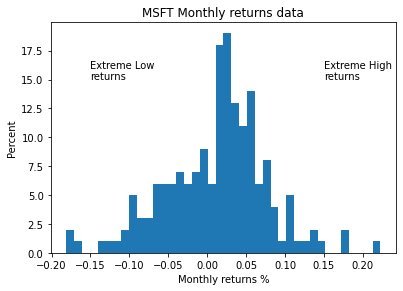

In [43]:
#PART I - See the distribution of daily returns for MSFT
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
msft_mlr.plot.hist(bins = 40)
ax1.set_xlabel("Monthly returns %")
ax1.set_ylabel("Percent")
ax1.set_title("MSFT Monthly returns data")
ax1.text(-0.15,15,"Extreme Low\nreturns")
ax1.text(0.15,15,"Extreme High\nreturns")
plt.show()

In [44]:
#PART J - Create T-Test to find P-value for MSFT
stats.ttest_1samp(msft_mlr,0)

#Print p-value for MSFT
print(stats.ttest_1samp(msft_mlr,0))

Ttest_1sampResult(statistic=2.417942172169834, pvalue=0.016616910634095153)


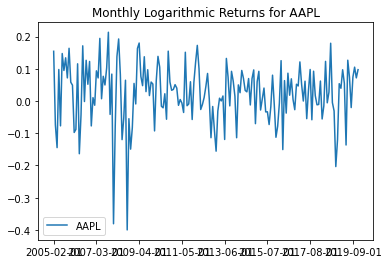

In [45]:
#PART G - Plot log returns for AAPL
df_log_aapl = {}
df_log_aapl['AAPL'] = aapl_mlr
df_log_aapl = pd.DataFrame(df_log_aapl)
df_log_aapl.plot(title="Monthly Logarithmic Returns for AAPL")

In [46]:
#PART H - Provide the summary stat for AAPL
aapl_mlr.describe()

count    179.000000
mean       0.023006
std        0.092824
min       -0.399819
25%       -0.023680
50%        0.033232
75%        0.082556
max        0.213256
Name: AAPL, dtype: float64

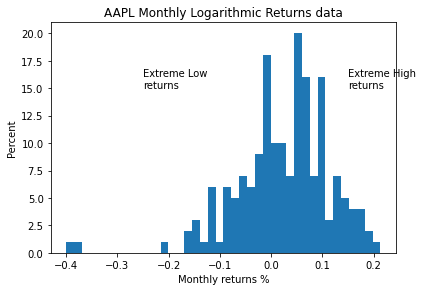

In [47]:
#PART I - See the distribution of monthly returns for AAPL
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
aapl_mlr.plot.hist(bins = 40)
ax1.set_xlabel("Monthly returns %")
ax1.set_ylabel("Percent")
ax1.set_title("AAPL Monthly Logarithmic Returns data")
ax1.text(-0.25,15,"Extreme Low\nreturns")
ax1.text(0.15,15,"Extreme High\nreturns")
plt.show()

In [48]:
#PART J - Create T-Test to find P-value for AAPL
stats.ttest_1samp(aapl_mlr,0)

#Print p-value for AAPL
print(stats.ttest_1samp(aapl_mlr,0))

Ttest_1sampResult(statistic=3.3159476466060873, pvalue=0.0011069826150315483)


In [70]:
#PART K - Create function that pulls the first and last values of the ticker column in a dataset, and annualizes the values based on the number of periods
def hpr_values (dataframe, ticker, periods):
  endvalue = dataframe.loc[dataframe.index[-1], ticker]
  beginningvalue = dataframe.loc[dataframe.index[0], ticker]

  #Calculate total HPR
  hpr = (beginningvalue-endvalue)/beginningvalue

  #Print total HPR
  print(ticker + " Total HPR: "+"{:.2%}".format(hpr))

  #Calculate annualized HPR
  a_hpr = (((1+hpr)**(1/periods))-1)

  #Print annualized HPR as a percentage
  print(ticker + " Annualized HPR: "+"{:.2%}".format(a_hpr))
  print("\n")

  #return annualized HPR for use
  return a_hpr

In [69]:
#PART K - Execute function to calculate total and annualized HPR
hpr_values (dataset_mlr, 'IBM', 15)
hpr_values (dataset_mlr, 'MSFT', 15)
hpr_values (dataset_mlr, 'AAPL', 15)

IBM Total HPR: 196.18%
IBM Annualized HPR: 7.51%


MSFT Total HPR: 201.71%
MSFT Annualized HPR: 7.64%


AAPL Total HPR: 36.96%
AAPL Annualized HPR: 2.12%




0.02118887229100297

# Part 2 Summary & Analysis

Our dataset is from January 1, 2005, to December 31, 2019. We compared the monthly adjusted close prices of three technology/software companies – IBM (IBM), Microsoft (MSFT), and Apple (AAPL). The first five rows of the 2005 data for each company shows relative stability within each company. The last five rows of the 2019 data show a significant increase for all the companies. For the 2005 dataset IBM had the highest values, approximately 3x that of its closest rival, MSFT. In 2019 MSFT overtook IBM for the highest adjusted closing prices. For their final month the adjusted close prices were 111.77 for IBM, 153.75 for MSFT, and 72.04 for AAPL. The size of the three data imports is 16.412 Megabytes. When plotted together IBM has more volatility than MSFT or AAPL. AAPL and MSFT have been able to maintain consistent growth over the period, while IBM has had comparatively large fluctuations. 

The mean for IBM is .004, the standard deviation is .06, the minimum is .27 and the maximum is .167. The mean for Microsoft is .012, the standard deviation is .065, the minimum is .181 and the maximum is .223. The mean for Apple is .023, the standard deviation is .093, the minimum is -.399 and the maximum is .213.  Apple’s and Microsoft’s mean monthly log returns are zero, while IBM is a nonzero value. 
 
The histogram for IBM shows a lot of fluctuation in the daily returns, most of the returns happened around -.025 and 0.0, approximately. P-values for IBM were calculated as 36.5%, an ideal p-value is below 5%. This suggests that the dropped outliers were not significant enough to modify the data and more data needs to be pulled. 
 
MSFT’s histogram shows most daily returns between .025 to .05. The p-value was calculated as statistically significant at 1.6%. The histogram for AAPL shows the highest daily returns at roughly, -.02 and .05. The p-value was calculated as 0%.  
